<a href="https://colab.research.google.com/github/mrunalibokadee/Loan-Eligibility-Prediction/blob/main/Loan_Eligibility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries: pandas for data manipulation, numpy for numerical operations, and randint from random for generating random integers.

import pandas as pd
import numpy as np
from random import randint

In [ ]:
# Reading the training data from the specified CSV file

train=pd.read_csv(r'/content/train_u6lujuX_CVtuZ9i.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Extracting the 'Loan_Status' column, dropping it from the training data, reading the test data, extracting 'Loan_ID' from the test data,
# and creating a combined dataset by appending the training and test data. Displaying the first few rows of the combined dataset.

Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
test=pd.read_csv(r'/content/train_u6lujuX_CVtuZ9i.csv')
Loan_ID=test.Loan_ID
data=train.append(test)
data.head()

<ipython-input-26-233f4d9660dd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,NaN


In [ ]:
# Generating descriptive statistics for the combined dataset using the describe() function.

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,1228.000000,1228.000000,1184.000000,1200.000000,1128.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6106.551744,2925.055686,85.551144,65.093248,0.364716
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5800.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
# Checking and displaying the count of missing values in each column of the combined dataset using the isnull() function.

data.isnull().sum()

Loan_ID                0
Gender                26
Married                6
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History       100
Property_Area          0
Loan_Status          614
dtype: int64

In [ ]:
# Checking the data type of the 'Dependents' column in the combined dataset using the dtypes attribute.

data.Dependents.dtypes

dtype('O')

<ipython-input-30-9c0a67c2d182>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


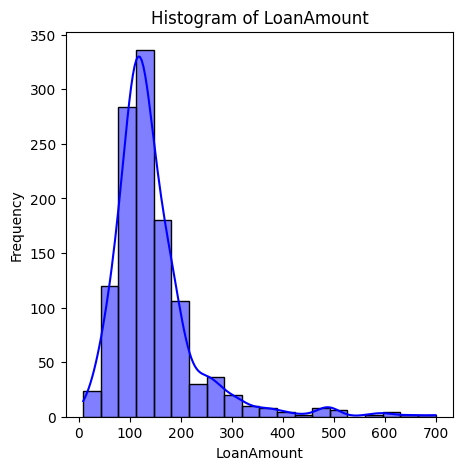

In [ ]:
# Importing necessary libraries for visualization.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Calculating the correlation matrix for the combined dataset.
corrmat = data.corr()

# Creating a histogram for the 'LoanAmount' column.
plt.figure(figsize=(5, 5))
sns.histplot(data['LoanAmount'], bins=20, kde=True, color='blue')
plt.title('Histogram of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Mapping 'Male' to 1 and 'Female' to 0 in the 'Gender' column of the combined dataset.
# Displaying the count of each unique value in the 'Gender' column using value_counts().

data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    978
0.0    224
Name: Gender, dtype: int64

<ipython-input-32-ea6c7646aac0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


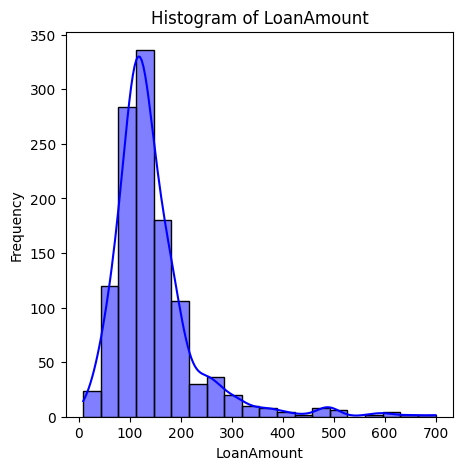

In [ ]:
# Calculating the correlation matrix for the combined dataset.
corrmat = data.corr()

# Creating a histogram for the 'LoanAmount' column.
plt.figure(figsize=(5, 5))
sns.histplot(data['LoanAmount'], bins=20, kde=True, color='blue')
plt.title('Histogram of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Mapping 'Yes' to 1 and 'No' to 0 in the 'Married' column of the combined dataset.

data.Married=data.Married.map({'Yes':1,'No':0})

In [ ]:
# Displaying the count of each unique value in the 'Married' column of the combined dataset using value_counts().

data.Married.value_counts()

1.0    796
0.0    426
Name: Married, dtype: int64

In [ ]:
# Mapping '0' to 0, '1' to 1, '2' to 2, and '3+' to 3 in the 'Dependents' column of the combined dataset.
# Displaying the count of each unique value in the 'Dependents' column using value_counts().

data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
data.Dependents.value_counts()


0.0    690
1.0    204
2.0    202
3.0    102
Name: Dependents, dtype: int64

<ipython-input-36-ea6c7646aac0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


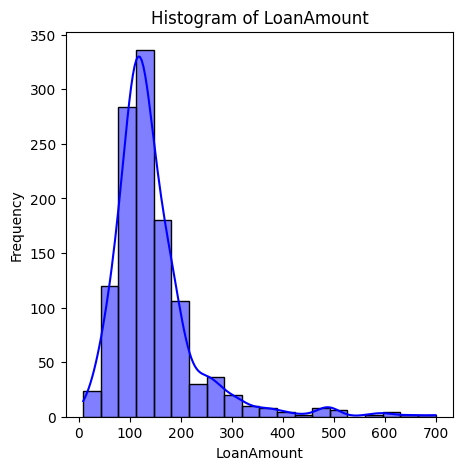

In [ ]:
# Calculating the correlation matrix for the combined dataset.
corrmat = data.corr()

# Creating a histogram for the 'LoanAmount' column.
plt.figure(figsize=(5, 5))
sns.histplot(data['LoanAmount'], bins=20, kde=True, color='blue')
plt.title('Histogram of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Mapping 'Graduate' to 1 and 'Not Graduate' to 0 in the 'Education' column of the combined dataset.
# Displaying the count of each unique value in the 'Education' column using value_counts().

data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})
data.Education.value_counts()

1    960
0    268
Name: Education, dtype: int64

In [ ]:
# Mapping 'Yes' to 1 and 'No' to 0 in the 'Self_Employed' column of the combined dataset.
# Displaying the count of each unique value in the 'Self_Employed' column using value_counts().

data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})
data.Self_Employed.value_counts()

0.0    1000
1.0     164
Name: Self_Employed, dtype: int64

In [ ]:
# Displaying the count of each unique value in the 'Property_Area' column of the combined dataset using value_counts().

data.Property_Area.value_counts()


Semiurban    466
Urban        404
Rural        358
Name: Property_Area, dtype: int64

In [ ]:
# Mapping 'Urban' to 2, 'Rural' to 0, and 'Semiurban' to 1 in the 'Property_Area' column of the combined dataset.

data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [ ]:
# Displaying the count of each unique value in the 'Property_Area' column of the combined dataset after mapping using value_counts().

data.Property_Area.value_counts()

1    466
2    404
0    358
Name: Property_Area, dtype: int64

<ipython-input-42-ea6c7646aac0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


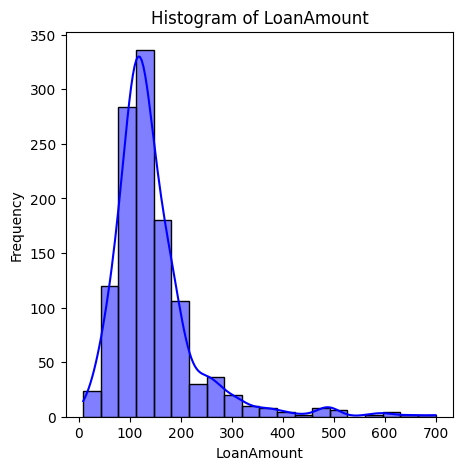

In [ ]:
# Calculating the correlation matrix for the combined dataset.
corrmat = data.corr()

# Creating a histogram for the 'LoanAmount' column.
plt.figure(figsize=(5, 5))
sns.histplot(data['LoanAmount'], bins=20, kde=True, color='blue')
plt.title('Histogram of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Displaying the first few rows of the modified combined dataset.

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,NaN
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,NaN
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,NaN
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,NaN
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,NaN


In [ ]:
# Displaying the total number of elements in the 'Credit_History' column of the combined dataset using the size attribute.

data.Credit_History.size

1228

In [ ]:
# Filling the missing values in the 'Credit_History' column of the combined dataset with a random integer (0 or 1) using numpy's randint.

data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [ ]:
# Checking and displaying the count of missing values in each column of the combined dataset after filling missing values.

data.isnull().sum()

Loan_ID                0
Gender                26
Married                6
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History         0
Property_Area          0
Loan_Status          614
dtype: int64

In [ ]:
# Filling the missing values in the 'Married' column of the combined dataset with a random integer (0 or 1) using numpy's randint.

data.Married.fillna(np.random.randint(0,2),inplace=True)

In [ ]:
# Checking and displaying the count of missing values in each column of the combined dataset after filling missing values in the 'Married' column.

data.isnull().sum()

Loan_ID                0
Gender                26
Married                0
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History         0
Property_Area          0
Loan_Status          614
dtype: int64

In [ ]:
# Filling the missing values in the 'LoanAmount' column with the median and in the 'Loan_Amount_Term' column with the mean.
# Checking and displaying the count of missing values in each column of the combined dataset after filling missing values.

data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)
data.isnull().sum()

Loan_ID                0
Gender                26
Married                0
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          614
dtype: int64

In [ ]:
# Displaying the count of each unique value in the 'Gender' column of the combined dataset using value_counts().

data.Gender.value_counts()

1.0    978
0.0    224
Name: Gender, dtype: int64

In [ ]:
# Filling the missing values in the 'Gender' column of the combined dataset with a random integer (0 or 1) using numpy's randint.
# Displaying the count of each unique value in the 'Gender' column after filling missing values.

from random import randint
data.Gender.fillna(np.random.randint(0,2),inplace=True)
data.Gender.value_counts()

1.0    978
0.0    250
Name: Gender, dtype: int64

In [ ]:
# Filling the missing values in the 'Dependents' column with the median.
# Checking and displaying the count of missing values in each column of the combined dataset after filling missing values.

data.Dependents.fillna(data.Dependents.median(),inplace=True)
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          614
dtype: int64

<ipython-input-53-ea6c7646aac0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


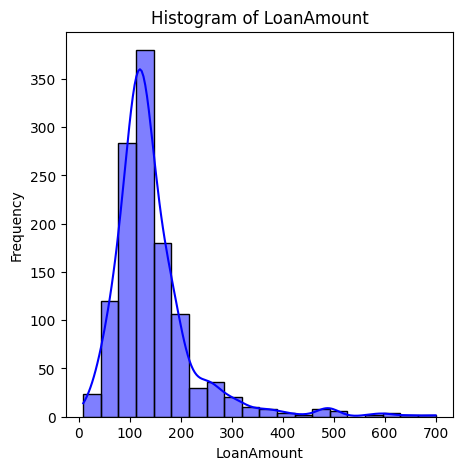

In [ ]:
# Calculating the correlation matrix for the combined dataset.
corrmat = data.corr()

# Creating a histogram for the 'LoanAmount' column.
plt.figure(figsize=(5, 5))
sns.histplot(data['LoanAmount'], bins=20, kde=True, color='blue')
plt.title('Histogram of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Filling the missing values in the 'Self_Employed' column with a random integer (0 or 1) using numpy's randint.
# Checking and displaying the count of missing values in each column of the combined dataset after filling missing values.

data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          614
dtype: int64

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2,NaN
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,NaN
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,NaN
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,NaN
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,NaN


In [ ]:
# Dropping the 'Loan_ID' column from the combined dataset.
# Checking and displaying the count of missing values in each column of the dataset after dropping 'Loan_ID'.

data.drop('Loan_ID',inplace=True,axis=1)
data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          614
dtype: int64

In [ ]:
# Creating training features (train_X) and labels (train_y) from the first 614 rows of the combined dataset.
# Creating testing features (X_test) from the remaining rows of the combined dataset.
# Setting a seed value for reproducibility.

train_X=data.iloc[:614,]
train_y=Loan_status
X_test=data.iloc[614:,]
seed=7

In [ ]:
# Splitting the training data into training and testing sets using train_test_split from sklearn.
# Setting the random state to the specified seed value for reproducibility.

from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=seed)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create the HistGradientBoostingClassifier model
svc = HistGradientBoostingClassifier()

# Fit the model to the data
svc.fit(train_X, train_y)

# Predict the labels for the test data
pred = svc.predict(test_X)

# Evaluate the model
print(accuracy_score(test_y, pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))

0.7792207792207793
[[26 22]
 [12 94]]
              precision    recall  f1-score   support

           0       0.68      0.54      0.60        48
           1       0.81      0.89      0.85       106

    accuracy                           0.78       154
   macro avg       0.75      0.71      0.73       154
weighted avg       0.77      0.78      0.77       154



In [ ]:
# Importing pandas and creating an empty DataFrame named df_output.

import pandas as pd
df_output=pd.DataFrame()

In [ ]:
# Making predictions on the test data using the Support Vector Classifier (svc) and converting the output to integers.

outp=svc.predict(test_X).astype(int)
outp

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
# Adding 'Loan_ID' and 'Loan_Status' columns to the DataFrame df_output using Loan_ID and the predicted values (outp).

df_output['Loan_ID'] = Loan_ID
df_output['Loan_Status'] = pd.Series(outp)

In [ ]:
# Displaying the first few rows of the DataFrame df_output.

df_output.head()

,Loan_ID,Loan_Status
0,LP001002,0.0
1,LP001003,1.0
2,LP001005,0.0
3,LP001006,1.0
4,LP001008,0.0
